# Understanding the Reaction to Amazon Prime Air (Or: Tapping Twitter's Firehose for Fun and Profit with *pandas*) 

On Cyber Monday Eve, Jeff Bezos revealed that Amazon may have intentions to one day deliver many of its goods by unmanned aerial vehicles through a service called *Amazon Prime Air* as part of an segment for the television show *60 Minutes*. This notebook explores ~125k tweets from Twitter's firehose that were captured shortly after the announcement and teaches you how you can be equipped to capture interesting data within moments of announcements for your own analysis.

<br />
<center><iframe width="560" height="315" src="//www.youtube.com/embed/98BIu9dpwHU" frameborder="0" allowfullscreen></iframe><br /><center>
<br />

## Aspire

Let's seek to better understand the "Twitter reaction" to Amazon's announcement that drones may one day be delivering packages right to our doorsteps.

## Acquire

Twitter is an ideal source of data that can help you to understand the reaction to newsworthy events, because it has more than 200M active monthly users who tend to use it to frequently share short informal thoughts about anything and everything. Although Twitter offers a Search API that can be used to query for "historical data", tapping into the firehose with the Streaming API is a preferred option because it provides you the ability to acquire much larger volumes of data with keyword filters in real-time.

There are numerous options for storing the data that you acquire from the firehose. A document-oriented database such as <a href="http://www.mongodb.org/">MongoDB</a> makes a fine choice and can provide useful APIs for filtering and analysis. However, we'll opt to simply store the tweets that we fetch from the firehose in a newline-delimited text file, because we'll use the *pandas* library to analyze it as opposed to relying on MongoDB or a comparable option. 

Note: Should you have preferred to instead sink the data to MongoDB, the *mongoexport* commandline tool could have exported it to a newline delimited format that is exactly the same as what we will be writing to a file. Either way, you're covered.

### Python Dependencies

There are only a few third-party packages that are required to use the code in this notebook: 

* The *twitter* package trivializes the process of tapping into Twitter's Streaming API for easily capturing tweets from the firehose
* The *pandas* package provides a highly-performant "spreadsheet-like interface" into large collections of records such as tweets
* The *nltk* packages provides some handy functions for processing natural language (the "140 characters" of content) in the tweets

You can easily install these packages in a terminal with *pip install twitter pandas nltk*, or you can install them from within IPython Notebook by using "Bash magic". Bash magic is just a way of running Bash commands from within a notebook as shown below where the first line of a cell prefixed with *%%bash*.

In [1]:
%%bash

pip install twitter pandas nltk

### Tapping Twitter's Firehose

It's a lot easier to tap into Twitter's firehose than you might imagine if you're using the right library. The code below show you how to create a connection to <a href="https://dev.twitter.com/docs/streaming-apis">Twitter's Streaming API</a> and filter the firehose for tweets containing keywords. For simplicity, each tweet is saved in a newline-delimited file as a JSON document.

In [5]:
import io
import json
import twitter

# XXX: Go to http://twitter.com/apps/new to create an app and get values
# for these credentials that you'll need to provide in place of these
# empty string values that are defined as placeholders.
#
# See https://vimeo.com/79220146 for a short video that steps you
# through this process
#
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = 'k7TcWQNvLAFw6UHp8b6tjSfys'
CONSUMER_SECRET = 'HoJ4C5Qgb0kGpt1NkPp4RAuInseNYOHLXOXrpksAU7jwRdW2ZY'
OAUTH_TOKEN = '105425189-p1Oif8hdJ4RXuN35mbPfH81onaVScOaziCefbRxJ'
OAUTH_TOKEN_SECRET = '8gikBBD7lRt7mbGG9JO5Yfy9kMS4OjesrN0UQIZaOEJOI'

# The keyword query

QUERY = 'Amazon'

# The file to write output as newline-delimited JSON documents
OUT_FILE = QUERY + ".json"


# Authenticate to Twitter with OAuth

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

# Create a connection to the Streaming API

twitter_stream = twitter.TwitterStream(auth=auth)


print('Filtering the public timeline for "{0}"'.format(QUERY))

# See https://dev.twitter.com/docs/streaming-apis on keyword parameters

stream = twitter_stream.statuses.filter(track=QUERY)

# Write one tweet per line as a JSON document. 

with io.open(OUT_FILE, 'w', encoding='utf-8', buffering=1) as f:
    for tweet in stream:
        f.write(str(u'{0}\n'.format(json.dumps(tweet, ensure_ascii=False))))
        print(tweet['text'])

Filtering the public timeline for "Amazon"
@elonmusk Vs @JeffBezos. Who is the most successful visionary? RT for Elon and Like for Bezos! https://t.co/0u3UJBERy3
RT @book_tribe: • Buckle Up! My pulse-pounding new YA/#Scifi tale VITA AETERNA is now live on Amazon. Don't miss it! #KindleUnlimited https…
RT @MaryHSayler: For #writingtips and help with your #writing in general, get the Christian Writer's Guide e-book https://t.co/OCG8e2n1Yb v…
ねんどろいど ロックマン11 運命の歯車! !  ロール ロックマン11Ver. ノンスケール ABS&amp;PVC製 塗装済み可動フィギュア グッドスマイ... https://t.co/oX86K6sjQi @amazonJPさんから
そうゆうことか（笑）

リチウムイオン電池と、充電回路が300円なら、秋葉原よりAmazonより安いね。

お買い得（笑） https://t.co/BCm0F8rrde
31% off, 4.3 stars: Amouage Interlude Man's Eau De Parfum Spray 3.4  Fl..... Details: Heart Notes: Amber, Frankince… https://t.co/fKsH9KOFyC
RT @fujitv_movie: 『今夜、ロマンス劇場で』公開記念！
#2週連続綾瀬はるかSP プレゼント企画

フジテレビムービー（ @fujitv_movie ）をフォロー＆この投稿をRT！抽選で8名様にAmazon ギフト券2000円分をプレゼント🎁✨
キャンペーン期間…
RACGP and minimum software standards, NZ's south goes HCH, Amazon H

Valentine's Day Gift, Unique &amp; Versatile Infinity Scarf, Just for her&gt;https://t.co/lAV5sj78ey
Save 84% &amp; ONLY $5.20… https://t.co/TuU0DF9oVf
RT @RyanBiddulph How to Stay in Shape While Traveling Abroad eBook https://t.co/eXptGa3EkO #fitness #travel #digitalnomad #amazon
RT @GoodJobsFirst: CNBC: Amazon's HQ2 is a 'money losing investment for taxpayers,' warns top Fed official https://t.co/OIHJzuVrOD
#FREE #KINDLEUNLIMITED #KU
#DETROIT #Thriller @LindaStyle_
https://t.co/gIzGeA3uSv
https://t.co/4oE4PI0mQD
https://t.co/UabDdwfEeW
For those at Amazon interested in Austin weather, it’s currently raining acid. Sounds bad, but it’s a nice change i… https://t.co/F8hL5BOZXM
#3: Trace on Ice (双葉社スーパームック)  https://t.co/0Bwy4a5IH6
RT @LaydenRobinson: "Uncle Don's Second Offense" is 300 Pages of absolutely @ positively outrageous #comedy and insanity. Hold on to your b…
Coming in Hot 2: Rescue Me! 
Pre-Order *N*O*W*
Lock in #99c #BoxedSet #doctor #paramedics #firemen
Buy on #amazon… http

身長165cm体重38kg 超スレンダーボディでフェラ動画を愛し日頃からオナニーをしているパイパン美少女 AVデビュー りりか(18歳)  激しくしたら壊れそうな華奢な体。太いチ○ポだって嬉しそうに頬張ります。 https://t.co/pe15FIe1EB …
https://t.co/TFpBlEJy5r #610mL #amazon #body #BodyCalm #Calm #cleanse #essential #French #gifts #Grade #Harmony #kit
Automation, AdWords and Amazon: Ashley Fletcher on the future of paid search https://t.co/0ZOsGkIubq
RT @5OQe8T16oAZQe8l: ￥毎月プレゼント企画￥
Amazonギフト5,000円分！
抽選で10名様にプレゼントします
【応募方法】フォロー&amp;RT
【応募締切】毎月15日23:59まで
固定ツイートをリツイートで""当選確率2倍""！！！
https://t.c…
RT @ErinAJensen: I promised my readers I'd shout from the rooftops when DREAM SIGHT (Dream Waters #3) was released,
but my 14 year old aske…
RT @SolTaylorRdL: Apuesta equivocada: cuando la diplomacia falla
by: @ContratameYGana
#amazon: https://t.co/iC0QtkCSD0  
Intriga, acción y…
Pick up Jenson Button's new autobiography book, Life to the Limit from #Amazon https://t.co/tTsUNWvU6j #F1 https://t.co/Xe2RffZDZW
RT "This discovery will be bigger than the Dead Sea Scrolls!"
The archaeologists had no idea 

@Ipensa7 Disguise Elena Adventure Dress Classic Elena of Avalor Disney Costume, Medium/7-8 is now on sale for $14.7… https://t.co/IaOccHEKg2
66% OFF #sale #save #spehla #valentinesday #gift #forher @amazon Sephla 14k White Gold Plated Forever Lover Heart P… https://t.co/tTVMt5Lfnz
The good news for #HR is that Amazon’s arrival could give it the chance to shine https://t.co/YC9Lj6JIcp  @hreonline
RT @freee_gifts: #プレゼント企画

iTunesカード
5000円×10名様

Google Playカード
3000円×5名様

Amazonギフト券
3000円×5名様

↓↓応募方法↓↓
①アカウントフォロー＋固定ツイートRT
②下記からLINE@友達追…
[ Apparently nothin' [Single-CD] ] YOUNG DISCIPLES https://t.co/CgqbUaP0q1
今、Amazonで人気のゲーム #8: 【PS4】ソードアート・オンライン フェイタル・バレット 【早期購入特典】1ゲーム内で使用できる衣装『アスナSAO衣装』のプロダクトコード… https://t.co/qHcNZlL0Pd
RT @Zeyozo: “El dinero no compra la felicidad”

Comida: JAJAJAJAJAJA
Jangueos: JAJAJAJAJA
Celular: JAJAJAJJAA
Internet: JAJAJAJAJAJAJA
eBay…
RT @Karla_garrison: 26 of the Handiest Gadgets on Amazon Under $20 
https://t.co/jhM4IdqzAd
Netflix, Amazon, and HBO handed NBC m

Join me to get @Listia's new $XNK #cryptocurrency for free! Use code "DLPCMZ" for an extra 5,000 credits. Just got… https://t.co/KdA922NxRS
RT @Alexsimonsautor: Dos amigos, un deseo oculto y una historia de amor increíble.
BROMANCE: El libro Erótico Gay del 2018
ALEX SIMON'S htt…
I liked a @YouTube video https://t.co/aHjrusxnnj Amazon Uzi
60 Years of Country Music Trivia all for $1.31 from Amazon https://t.co/9uFyjwLDf9 and a great gift for someone! https://t.co/FA0Vo4I7oO
BO3 戦績コピー垢販売！！

こんにちは〜
今となってはレアな戦績コピー垢を在庫の限り販売します！

2種類の商品がありますので目をお通し下さいm(_ _)m

お支払いはAmazonギフトでお願いします(￣▽￣)

在庫には限りがありますのでお早めに！
https://t.c
The White Arrow (newly released on 10/3) 
https://t.co/PAwODAM5Gp 
#fantasy #kindle #bookboost 
#IARTG #ASMSG #BYNR
RT @umairh: the NHS is one of history's greatest single accomplishments. Ubers and Googles etc are nothing comparatively speaking. it is in…
Android6.0.1の（Xperiaz3）のroot化のやり方わかるかたいたら教えてください。単体で出来る方法でお願いします。root化成功したら報酬にGoogleプレイかiTunesかAmazonか任天堂を1500円分お渡しします。わかるかた

#webdesign #socialmedia Amazing Amazon review details the horrors of giant inflatable beach balls - Every product h… https://t.co/IDKfhnJjHk
RT @DeelanRH: I just bought: Pipedream Extreme F*** My Big A** via @amazon https://t.co/8ClCqiRO3p
【定期】『101人が選ぶ「とっておきの言葉」 』に川井さんも寄稿！ #川井憲次 https://t.co/I5jpow9aG4
RT @opsliz: esqueci de divulgar, mas por algum motivo wild tá em 2 lugar entre os mais vendidos grátis na Amazon hoje. Então quem não leu a…
Show Don't Tell: Learn how to show the five basic emotions (anger,sadness, joy, love, hate) https://t.co/ufAAsvPwhJ… https://t.co/H8TkMYqPct
【デスクライト】ベスト10
「デスクライト」TUXWANG LED調光 おしゃれ デスクスタンド クランプ 目に優しい照明 フレキシブルアーム 電気スタンド 卓上学習用 調光式 デスクスタンドライト勉強机 スタンド 寝室 読書灯… https://t.co/L3oO4zkHEA
RT @SimmillKj: Get a great read, &amp; do a good deed.
All my books donate a % to @TheDMWS &amp; are on #KU https://t.co/x0KkVJIgmD
#IARTG #Charity
RT @byoblu: @lauraboldrini Più bambini da lasciare ai nonni (chi ce li ha) o alle Baby sitter, perché i genitori non se li pos

KeyboardInterrupt: 

## Analyze

Assuming that you've amassed a collection of tweets from the firehose in a line-delimited format, one of the easiest ways to load the data into *pandas* for analysis is to build a valid JSON array of the tweets.

Note: With *pandas*, you will need to have an amount of working memory proportional to the amount of data that you're analyzing. For reference, it takes on the order of ~8GB of memory to analyze ~125k tweets as shown in this notebook. (Bear in mind that each tweet is roughly 5KB of text when serialized out to a file.)

In [8]:
import pandas as pd

# A text file with one tweet per line

DATA_FILE = "Amazon.json"

# Build a JSON array

data = "[{0}]".format(",".join([l for l in open(DATA_FILE).readlines()]))

# Create a pandas DataFrame (think: 2-dimensional table) to get a 
# spreadsheet-like interface into the data

df = pd.read_json(data, orient='records')

print("Successfully imported", len(df), "tweets")

Successfully imported 356 tweets


Whereas you may be used to thinking of data such as a list of dictionaries in a rows-oriented paradigm, pandas DataFrame exposes a convenient columnar view of the data that makes it easy to slice and dice by particular fields in each record. You can print the data frame to display the columnar structure and some stats about each column.

In [9]:
# Printing a DataFrame shows how pandas exposes a columnar view of the data

print(df)

     contributors  coordinates          created_at display_text_range  \
0             NaN          NaN 2018-02-05 21:29:48                NaN   
1             NaN          NaN 2018-02-05 21:29:48                NaN   
2             NaN          NaN 2018-02-05 21:29:48                NaN   
3             NaN          NaN 2018-02-05 21:29:49                NaN   
4             NaN          NaN 2018-02-05 21:29:50            [0, 61]   
5             NaN          NaN 2018-02-05 21:29:50           [0, 140]   
6             NaN          NaN 2018-02-05 21:29:50                NaN   
7             NaN          NaN 2018-02-05 21:29:51                NaN   
8             NaN          NaN 2018-02-05 21:29:51                NaN   
9             NaN          NaN 2018-02-05 21:29:51                NaN   
10            NaN          NaN 2018-02-05 21:29:51            [0, 60]   
11            NaN          NaN 2018-02-05 21:29:51                NaN   
12            NaN          NaN 2018-02-05 21:29:52 

Some of the items in a data frame may be null values, and these null values can wreak all kinds of havoc during analysis. Once you understand why they exist, it's wise to filter them out if possible. The null values in this collection of tweets are caused by "limit notices", which Twitter sends to tell you that you're being rate-limited. Notice in the columnar output above that the "limit" field (which is not typically part of a tweet) appears 16 times. This indicates that we received 16 limit notices and means that there are effectively 16 "rows" in our data frame that has null values for all of the fields we'd have expected to see.

Per the Streaming API guidelines, Twitter will only provide up to 1% of the total volume of the firehose, and anything beyond that is filtered out with each "limit notice" telling you how many tweets were filtered out. This means that tweets containing "Amazon" accounted for at least 1% of the total tweet volume at the time this data was being collected. The next cell shows how to "pop" off the column containing the sixteen limit notices and sum up the totals across these limit notices so that we can learn exactly how many tweets were filtered out across the aggregate.

In [10]:
# Observe the "limit" field that reflects "limit notices" where the streaming API
# couldn't return more than 1% of the firehose.
# See https://dev.twitter.com/docs/streaming-apis/messages#Limit_notices_limit

# Capture the limit notices by indexing into the data frame for non-null field
# containing "limit"

limit_notices = df[pd.notnull(df.limit)]

# Remove the limit notice column from the DataFrame entirely

df = df[pd.notnull(df['id'])]

print("Number of total tweets that were rate-limited", sum([ln['track'] for ln in limit_notices.limit]))
print("Total number of limit notices", len(limit_notices))

AttributeError: 'DataFrame' object has no attribute 'limit'

From this output, we can observe that ~1k tweets were not provided out of ~125k, more than 99% of the tweets about "Amazon" were received for the time period that they were being captured. In order to learn more about the bounds of that time period, let's create a time-based index on the *created_at* field of each tweet so that we can perform a time-based analysis.

In [4]:
# Create a time-based index on the tweets for time series analysis
# on the created_at field of the existing DataFrame.

df.set_index('created_at', drop=False, inplace=True)

print "Created date/time index on tweets"

Created date/time index on tweets


With a time-based index now in place, we can trivially do some useful things like calculate the boundaries, compute histograms, etc. Since tweets through to our filter in roughly the order in which they are created, no additional sorting should be necessary in order to compute the timeframe for this dataset; we can just slice the DataFrame like a list.

In [5]:
# Get a sense of the time range for the data

print "First tweet timestamp (UTC)", df['created_at'][0]
print "Last tweet timestamp (UTC) ", df['created_at'][-1]

First tweet timestamp (UTC) 2013-12-02 01:41:45
Last tweet timestamp (UTC)  2013-12-02 05:01:18


Operations such as grouping by a time unit are also easy to accomplish and seem a logical next step. The following cell illustrates how to group by the "hour" of our data frame, which is exposed as a datetime.datetime timestamp since we now have a time-based index in place.

In [6]:
# Let's group the tweets by hour and look at the overall volumes with a simple
# text-based histogram

# First group by the hour

grouped = df.groupby(lambda x: x.hour)

print "Number of relevant tweets by the hour (UTC)"
print

# You can iterate over the groups and print 
# out the volume of tweets for each hour 
# along with a simple text-based histogram

for hour, group in grouped:
    print hour, len(group), '*'*(len(group) / 1000)

Number of relevant tweets by the hour (UTC)

1 14788 **************
2 43286 *******************************************
3 36582 ************************************
4 30008 ******************************
5 1017 *


Bearing in mind that we just previously learned that tweet acquisition began at 1:41 UTC and ended at 5:01 UTC, it could be helpful to further subdivide the time ranges into smaller intervals so as to increase the resolution of the extremes. Therefore, let's group into a custom interval by dividing the hour into 15-minute segments. The code is pretty much the same as before except that you call a custom function to perform the grouping; pandas takes care of the rest.

Number of relevant tweets by intervals (UTC)

(1, '31-45') 2875 	**************
(1, '46-00') 11913 	***********************************************************
(2, '0-15') 13611 	********************************************************************
(2, '16-30') 11265 	********************************************************
(2, '31-45') 10452 	****************************************************
(2, '46-00') 7958 	***************************************
(3, '0-15') 10386 	***************************************************
(3, '16-30') 9542 	***********************************************
(3, '31-45') 8727 	*******************************************
(3, '46-00') 7927 	***************************************
(4, '0-15') 9042 	*********************************************
(4, '16-30') 7543 	*************************************
(4, '31-45') 7074 	***********************************
(4, '46-00') 6349 	*******************************
(5, '0-15') 1017 	*****


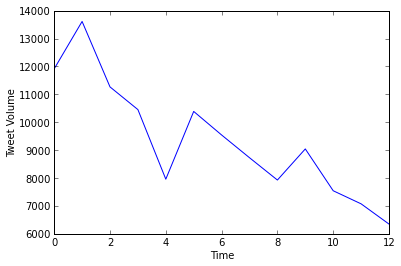

In [7]:
# Let's group the tweets by (hour, minute) and look at the overall volumes with a simple
# text-based histogram

def group_by_15_min_intervals(x):
    if   0 <= x.minute <= 15: return (x.hour, "0-15")
    elif 15 < x.minute <= 30: return (x.hour, "16-30")
    elif 30 < x.minute <= 45: return (x.hour, "31-45")
    else: return (x.hour, "46-00")


grouped = df.groupby(lambda x: group_by_15_min_intervals(x))

print "Number of relevant tweets by intervals (UTC)"
print

for interval, group in grouped:
    print interval, len(group), "\t", '*'*(len(group) / 200)

# Since we didn't start or end precisely on an interval, let's
# slice off the extremes. This has the added benefit of also
# improving the resolution of the plot that shows the trend
plt.plot([len(group) for hour, group in grouped][1:-1])
plt.ylabel("Tweet Volume")
plt.xlabel("Time")

In addition to time-based analysis, we can do other types of analysis as well. Generally speaking, one of the first things you'll want to do when exploring new data is count things, so let's compute the Twitter accounts that authored the most tweets and compare it to the total number of unique accounts that appeared.

In [8]:
from collections import Counter

# The "user" field is a record (dictionary), and we can pop it off
# and then use the Series constructor to make it easy to use with pandas.

user_col = df.pop('user').apply(pd.Series)

# Get the screen name column
authors = user_col.screen_name

# And count things
authors_counter = Counter(authors.values)

# And tally the totals

print
print "Most frequent (top 25) authors of tweets"
print '\n'.join(["{0}\t{1}".format(a, f) for a, f in authors_counter.most_common(25)])
print

# Get only the unique authors

num_unique_authors = len(set(authors.values))
print "There are {0} unique authors out of {1} tweets".format(num_unique_authors, len(df))


Most frequent (top 25) authors of tweets
_net_shop_	165
PC_shop_japan	161
work_black	160
house_book_jp	160
bousui_jp	147
Popular_goods	147
pachisuro_777	147
sweets_shop	146
bestshop_goods	146
__electronics__	142
realtime_trend	141
gardening_jp	140
shikaku_book	139
supplement_	139
__travel__	138
disc_jockey_jp	138
water_summer_go	138
Jungle_jp	137
necessaries_jp	137
marry_for_love	137
trend_realtime	136
sparkler_jp	136
PandoraQQ	133
flypfox	133
Promo_Culturel	132

There are 71794 unique authors out of 125681 tweets


At first glance, it would appear that there are quite a few bots accounting for a non-trivial portion of the tweet volume, and many of them appear to be Japanese! As usual, we can plot these values to get better intution about the underlying distrubution, so let's take a quick look at a frequency plot and histogram. We'll use logarithmic adjustments in both cases, so pay close attention to axis values.

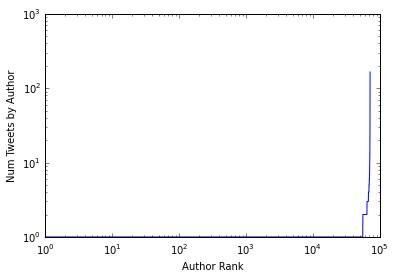

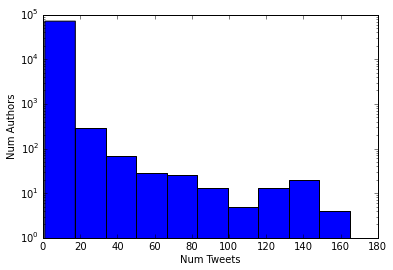

In [9]:
# Plot by rank (sorted value) to gain intution about the shape of the distrubtion

author_freqs = sorted(authors_counter.values())

plt.loglog(author_freqs)
plt.ylabel("Num Tweets by Author")
plt.xlabel("Author Rank")

# Start  a new figure

plt.figure()

# Plot a histogram to "zoom in" and increase resolution.

plt.hist(author_freqs, log=True)
plt.ylabel("Num Authors")
plt.xlabel("Num Tweets")

Although we could filter the DataFrame for coordinates (or locations in user profiles), an even simpler starting point to gain rudimentary insight about where users *might* be located is to inspect the language field of the tweets and compute the tallies for each language. With pandas, it's just a quick one-liner.

In [10]:
# What languages do authors of tweets speak? This might be a useful clue
# as to who is tweeting. (Also bear in mind the general timeframe for the 
# data when interpreting these results.)

df.lang.value_counts()

en     79151
ja     35940
und     3197
es      2713
de      1142
fr       717
id       442
pt       434
ko       283
vi       248
nl       212
th       209
zh       135
sk       114
ru        84
da        73
it        65
sl        65
pl        64
ht        63
et        56
tr        53
tl        43
ar        38
lt        30
no        17
lv        16
fi        15
hu        13
sv        12
bg         8
ne         7
el         5
he         5
fa         4
uk         3
my         2
is         2
ta         1
dtype: int64

A staggering number of Japanese speakers were talking about "Amazon" at the time the data was collected. Bearing in mind that it was already mid-day on Monday in Japan when it the news of the Amazon drones started to surface in the United States on Sunday evening, is this really all that surprising given Twitter's popularity in Japan?

Filtering on language also affords us to remove some noise from analysis since we can filter out only tweets in a specific language for inspection, which will be handy for some analysis on the content of the tweets themselves. Let's filter out only the 140 characters of text from tweets where the author speaks English and use some natural language processing techniques to learn more about the reaction.

In [11]:
# Let's just look at the content of the English tweets by extracting it
# out as a list of text

en_text = df[df['lang'] == 'en'].pop('text')

Although NLTK provides some advanced tokenization functions, let's just split the English text on white space, normalize it to lowercase, and remove some common trailing punctuation and count things to get an initial glance in to what's being talked about.

In [12]:
from collections import Counter

tokens = []
for txt in en_text.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])
    
# Use a Counter to construct frequency tuples
tokens_counter = Counter(tokens)

# Display some of the most commonly occurring tokens
tokens_counter.most_common(50)

[(u'amazon', 54778),
 (u'rt', 36409),
 (u'the', 25749),
 (u'drones', 24474),
 (u'to', 24040),
 (u'a', 21341),
 (u'delivery', 18557),
 (u'in', 17531),
 (u'of', 15741),
 (u'on', 14095),
 (u'drone', 13800),
 (u'by', 13422),
 (u'is', 12034),
 (u'for', 10988),
 (u'@amazon', 9318),
 (u'i', 9263),
 (u'and', 8793),
 (u'prime', 8783),
 (u'30', 8319),
 (u'air', 8026),
 (u'with', 7956),
 (u'future', 7911),
 (u'deliver', 7890),
 (u'get', 6790),
 (u'you', 6573),
 (u'your', 6543),
 (u'via', 6444),
 (u'deliveries', 6432),
 (u'this', 5899),
 (u'bezos', 5738),
 (u'will', 5703),
 (u'#primeair', 5680),
 (u'unmanned', 5442),
 (u'aerial', 5313),
 (u'under', 5308),
 (u'-', 5257),
 (u'mins', 5199),
 (u'that', 4890),
 (u'vehicles', 4835),
 (u'my', 4728),
 (u'from', 4720),
 (u'peek', 4699),
 (u'sneak', 4684),
 (u'unveils', 4555),
 (u'it', 4473),
 (u'minutes', 4459),
 (u'just', 4396),
 (u'at', 4394),
 (u'http://t.c\u2026', 4391),
 (u'packages', 4302)]

Not surprisingly, "amazon" is the most frequently occurring token, there are lots of retweets (actually, "quoted retweets") as evidenced by "rt", and lots of stopwords (commonly occurring words like "the", "and", etc.) at the top of the list. Let's further remove some of the noise by removing stopwords.

In [13]:
import nltk

# Download the stopwords list into NLTK

nltk.download('stopwords')

# Remove stopwords to decrease noise
for t in nltk.corpus.stopwords.words('english'):
    tokens_counter.pop(t)
    
# Redisplay the data (and then some)
tokens_counter.most_common(200)

[nltk_data] Downloading package 'stopwords' to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(u'amazon', 54778),
 (u'rt', 36409),
 (u'drones', 24474),
 (u'delivery', 18557),
 (u'drone', 13800),
 (u'@amazon', 9318),
 (u'prime', 8783),
 (u'30', 8319),
 (u'air', 8026),
 (u'future', 7911),
 (u'deliver', 7890),
 (u'get', 6790),
 (u'via', 6444),
 (u'deliveries', 6432),
 (u'bezos', 5738),
 (u'#primeair', 5680),
 (u'unmanned', 5442),
 (u'aerial', 5313),
 (u'-', 5257),
 (u'mins', 5199),
 (u'vehicles', 4835),
 (u'peek', 4699),
 (u'sneak', 4684),
 (u'unveils', 4555),
 (u'minutes', 4459),
 (u'http://t.c\u2026', 4391),
 (u'packages', 4302),
 (u'jeff', 4040),
 (u'http://t.co/w6kugw4egt', 3922),
 (u"amazon's", 3669),
 (u'flying', 3599),
 (u'ceo', 3205),
 (u'#amazon', 3074),
 (u'new', 2870),
 (u'free', 2797),
 (u'testing', 2585),
 (u'could', 2568),
 (u'shipping', 2541),
 (u'', 2422),
 (u'says', 2343),
 (u"'60", 2324),
 (u'like', 2300),
 (u'stuff', 2263),
 (u'years', 2194),
 (u'60', 2157),
 (u'use', 2134),
 (u'using', 1939),
 (u'&amp;', 1901),
 (u"minutes'", 1868),
 (u'kindle', 1735),
 (u"it'

What a difference removing a little bit of noise can make! We now see much more meaningful data appear at the top of the list: drones, signs that a phrase "30 mins" (which turned out to be a possible timeframe for a Prime Air delivery by a drone according to Bezos) might appear based the appearance of "30" and "mins"/"minutes" near the top of the list), signs of another phrase "prime air" (as evidenced by "prime", "air" and the hashtag "#primeair"), references to Jeff Bezos, URLs to investigate and more!

Even though we've already learned a lot, one of the challenges with only employing crude tokenization techniques is that you aren't left with any phrases. One of the simplest ways of disocvering meaningful phrases in text is to treat the problem as one of discovering statistical collocations. NLTK provides some routines to find collocations and includes a "demo" function that's a quick one-liner.

In [14]:
nltk_text = nltk.Text(tokens)
nltk_text.collocations()

Building collocations list
prime air; sneak peek; unmanned aerial; aerial vehicles;
http://t.co/w6kugw4egt http://t.c…; vehicles http://t.co/w6kugw4egt;
#primeair future; future deliveries; delivery drones; jeff bezos;
@amazon get; amazon prime; '60 minutes'; amazon unveils; cyber monday;
deliver packages; flying delivery; unveils flying; kindle fire; (also
helpful


Even without any prior analysis on tokenization, it's pretty clear what the topis is about as evidenced by this list of collocations. But what about the *context* in which these phrases appear? As it turns out, NLTK supplies another handy data structure that provides some insight as to how words appear in context called a concordance. Trying out the "demo functionality" for the concordance is as simple as just calling it as shown below. 

Toward the bottom of the list of commonly occurring tokens, the words "amazing" and "holy" appear. The word "amazing" is interesting, because it is usually the basis of an emotional reaction, and we're interested in examining the reaction. What about word "holy"? What might it mean? The concordance will help us to find out...

In [15]:
nltk_text.concordance("amazing")
print
nltk_text.concordance("holy")

Building index...
Displaying 25 of 508 matches:
s - @variety http://t.c… this looks amazing how will it impact drone traffic? -
it? amazon prime air delivery looks amazing http://t.co/icizw5vfrw rt @jeffreyg
gift card? @budgetearth &amp; other amazing bloggers are giving one away! ends 
k? damn that amazon prime air looks amazing im sure it would freak out some peo
egt http://t.c… @munilass amazon is amazing for what i use it for i'm okay with
wwglyqrq just in bonnie sold again! amazing book http://t.co/jce902iros #best-s
ase of 1000) http://t.co/d6l8p3jgbz amazing prospects! “@brianstelter on heels 
riety http://t.c… rt @dangillmor by amazing coincidence amazon had a youtube dr
rd_ferguson amazon prime air sounds amazing *hot* kindle fire hdx wi-fi 7' tabl
t.co/hrgxtrlumx this is going to be amazing if the faa allows it welcome to the
lying grill #primeair is absolutely amazing i'm excited to see the progress/dev
.co/w6kugw4egt http://t.c… the most amazing thing to me about amazon - w

It would appear that there is indeed a common thread of amazement in the data, and it's evident that @joshuatopolsky (who turns out to be Editor-in-chief of <a href="http://www.theverge.com/">The Verge</a>) is a commonly occurring tweet entity that warrants further investigation. Speaking of tweet entities, let's take an initial look at usernames, hashtags, and URLs by employing a simple heuristic to look for words prefixed with @, RT, #, and http to see what some of the most commonly occurring tweet entiteis are in the data.

In [16]:
# An crude look at tweet entities

entities = []
for txt in en_text.values:
    for t in txt.split():
        if t.startswith("http") or t.startswith("@") or t.startswith("#") or t.startswith("RT @"):
            if not t.startswith("http"):
                t = t.lower()
            entities.append(t.strip(" :,"))

entities_counter = Counter(entities)
for entity, freq in entities_counter.most_common()[:100]:
    print entity, freq

@amazon 8994
#primeair. 4767
http://t.c… 4391
http://t.co/w6kugw4EGt 3922
#amazon 3032
@60minutes 1325
#primeair 911
@mashable 787
@buzzfeed 774
@amazondrone 743
@bradplumer 743
@deathstarpr 735
#drones 729
http://t.co/JlFdNiHzks 711
http://t.co/BxSAVVzXZf 690
@badbanana 570
#kindle 467
@thenextweb 458
#amexamazon 441
http://t.co/MHqFG… 434
#giveaway 421
http:/… 417
#win 409
http:… 406
@techcrunch 391
#drone 383
#60minutes 380
http://t… 357
#tech 342
@levie 340
@variety 337
@breakingnews 331
@youtube 326
#cybermonday 325
@huffposttech 322
http://… 320
@jonrussell 304
@realjohngreen 300
#news 298
http://t.co/FNndPuMouA 294
@washingtonpost 284
@kotaku 283
@usatoday 283
http://t.… 280
#amazondrones 278
@nycjim 277
http://t.co/NG8… 270
http://t.co/rUu14XpvGo 270
@brianstelter 268
@majornelson 260
@benbadler 258
http://t.co/M7kqd26jVR 255
http… 254
@businessinsider 249
@huffingtonpost 245
http://t.co/DOEjXCC1vL 241
@sai 241
http://t.co/… 240
@verge 237
http://t.co/tAVunIXxo3 230
http://t.co

As you can see, there are lots of intersting tweet entities that give you helpful context for the announcement. One particularly notable observation is the appearance of "comedic accounts" such as @deathstarpr and @amazondrone near the top of the list, relaying a certain amount of humor. The <a href="https://twitter.com/DeathStarPR/status/407335634940878848">tweet</a> embedded below that references *Star Wars* was eventually retweeted over 1k times in response to the announcement! It wouldn't be difficult to determine how many retweets occurred just within the ~3 hour timeframe corresponding to the dataset we're using here.

<center>
<blockquote class="twitter-tweet" lang="en"><p>First look at Amazon&#39;s new delivery drone. (Also helpful for finding Rebel bases on Hoth.) <a href="http://t.co/JlFdNiHzks">pic.twitter.com/JlFdNiHzks</a></p>&mdash; Death Star PR (@DeathStarPR) <a href="https://twitter.com/DeathStarPR/statuses/407335634940878848">December 2, 2013</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>
</center>

When you take a closer look at some of the developed news stories, you also see sarcasm, unbelief, and even a bit of frustration about this being a "publicity stunt" for Cyber Monday.

Note: There proper way of parsing out tweet entities from the *entities* field that you can see in the DataFrame. It's marginally more work but has the primary advantage that you can see the "expanded URL" which provides better insight into the nature of the URL since you'll know its domain name. See <a href="http://nbviewer.ipython.org/github/ptwobrussell/Mining-the-Social-Web-2nd-Edition/blob/master/ipynb/Chapter%209%20-%20Twitter%20Cookbook.ipynb#Example-10.-Extracting-tweet-entities">Example 9-10, Extracting Tweet Entities</a> from *Mining the Social Web* for more on how to do that.

## Summarize

We *aspired* to learn more about the general reaction to Amazon's announcement about Prime Air by taking an initial look at the data from Amazon's firehose, and it's fair to say that we learned a few things about the data without too much effort. Lots more could be discovered, but a few of the themes that we were able to glean included:

* Amazement
* Humor
* Disbelief

Although these reactions aren't particularly surprising for such an outrageous announcement, you've hopefully learned enough that you could tap into Twitter's firehose to capture and analyze data that's of interest to you. There is no shortage of fun to be had, and as you've learned, it's easier than it might first appear.

Enjoy!

## Recommended Resources

If you enjoy analyzing data from social websites like Twitter, then you might enjoy the book *Mining the Social Web, 2nd Edition* (O'Reilly). You can learn more about it at <a href="http://MiningTheSocialWeb.com">MiningTheSocialWeb.com</a>. All source code is available in IPython Notebook format at <a href="http://bit.ly/MiningTheSocialWeb2E">GitHub</a> and can be previewed in the <a href="http://bit.ly/1cOlK6q">IPython Notebook Viewer</a>.

The book itself is a form of "premium support" for the source code and is available for purchase from <a href="http://amzn.to/GPd59m">Amazon</a> or <a href="http://bit.ly/135dHfs">O'Reilly Media</a>.